In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import warnings
warnings.filterwarnings("ignore")

In [26]:
df = pd. read_pickle('../input/dataset/Dataset.pkl') 

In [27]:
df

{'LabAnalysis':     %Time  irr_PH  irr_EC  irr_NH4  irr_K  irr_Na  irr_Ca  irr_Mg  irr_Si  \
 0   43836     5.3     4.3     1.10   15.2     0.3     9.6     4.9   0.090   
 1   43850     5.2     4.0     1.10   11.3     0.3     9.8     4.1   0.090   
 2   43864     4.8     3.9     1.30   11.6     0.3    10.2     3.5   0.090   
 3   43879     4.8     3.7     1.40   13.3     0.4     8.2     2.8   0.090   
 4   43893     4.7     3.5     1.10   11.3     0.4     7.6     2.5   0.010   
 5   43908     5.4     3.4     1.30   13.4     0.3     6.5     1.9   0.009   
 6   43921     5.6     3.1     1.20   11.0     0.2     5.6     2.0   0.009   
 7   43936     5.7     2.9     1.20    9.3     0.3     6.4     2.7   0.009   
 8   43951     6.0     3.6     0.80   13.6     0.3     8.3     3.2   0.010   
 9   43963     5.7     3.0     0.80    9.1     0.2     6.2     2.1   0.010   
 10  43836     4.3     5.1     1.10   15.1     0.3     9.7     5.0   0.090   
 11  43850     5.6     4.0     0.50   17.1     0.

In [28]:
with open('../input/dataset/Dataset.pkl', 'rb') as f:
    data = pickle.load(f)

In [29]:
data.keys()

dict_keys(['LabAnalysis', 'Resources', 'TomQuality', 'Production', 'CropParameters', 'GrodanSens', 'GreenhouseClimate'])

#Exploratory Data Analysis on *LabAnalysis* Dataset

In [30]:
lab_df=data['LabAnalysis']
lab_df.shape

(60, 39)

In [31]:
lab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 39 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   %Time       60 non-null     int64  
 1   irr_PH      60 non-null     float64
 2   irr_EC      60 non-null     float64
 3   irr_NH4     60 non-null     float64
 4   irr_K       60 non-null     float64
 5   irr_Na      60 non-null     float64
 6   irr_Ca      60 non-null     float64
 7   irr_Mg      60 non-null     float64
 8   irr_Si      60 non-null     float64
 9   irr_NO3     60 non-null     float64
 10  irr_Cl      60 non-null     float64
 11  irr_SO4     60 non-null     float64
 12  irr_HCO3    60 non-null     float64
 13  irr_PO4     60 non-null     float64
 14  irr_Fe      60 non-null     float64
 15  irr_Mn      60 non-null     float64
 16  irr_Zn      60 non-null     float64
 17  irr_B       60 non-null     float64
 18  irr_Cu      60 non-null     float64
 19  irr_Mo      60 non-null     flo

In [32]:
lab_df.rename(columns = {'%Time':'Time'}, inplace = True)

In [33]:
lab_df["Time"]= pd.to_datetime(lab_df["Time"])

In [34]:
lab_df.head(10)

,Time,irr_PH,irr_EC,irr_NH4,irr_K,irr_Na,irr_Ca,irr_Mg,irr_Si,irr_NO3,...,drain_Cl,drain_SO4,drain_HCO3,drain_PO4,drain_Fe,drain_Mn,drain_Zn,drain_B,drain_Cu,drain_Mo
0,1970-01-01 00:00:00.000043836,5.3,4.3,1.1,15.2,0.3,9.6,4.9,0.090,21.7,...,7.60,13.5,1.40,2.00,27.8,7.7,5.7,49.0,0.9,0.61
1,1970-01-01 00:00:00.000043850,5.2,4.0,1.1,11.3,0.3,9.8,4.1,0.090,21.0,...,10.00,23.4,1.30,0.42,21.1,0.8,6.4,56.0,0.7,0.94
2,1970-01-01 00:00:00.000043864,4.8,3.9,1.3,11.6,0.3,10.2,3.5,0.090,18.6,...,12.00,17.5,1.00,1.30,18.3,1.1,3.7,93.0,0.5,0.47
3,1970-01-01 00:00:00.000043879,4.8,3.7,1.4,13.3,0.4,8.2,2.8,0.090,16.0,...,20.00,13.2,0.10,6.10,24.4,4.5,3.8,134.0,1.0,0.13
4,1970-01-01 00:00:00.000043893,4.7,3.5,1.1,11.3,0.4,7.6,2.5,0.010,14.1,...,21.20,11.6,0.10,9.32,31.0,11.0,6.5,113.0,1.1,0.10
5,1970-01-01 00:00:00.000043908,5.4,3.4,1.3,13.4,0.3,6.5,1.9,0.009,17.1,...,4.30,12.3,0.09,6.41,35.0,9.8,8.2,60.0,1.1,0.10
6,1970-01-01 00:00:00.000043921,5.6,3.1,1.2,11.0,0.2,5.6,2.0,0.009,16.9,...,0.10,11.0,0.09,5.60,30.0,13.0,9.5,37.0,1.1,0.10
7,1970-01-01 00:00:00.000043936,5.7,2.9,1.2,9.3,0.3,6.4,2.7,0.009,16.6,...,0.09,11.3,0.09,5.99,27.0,15.0,8.3,66.0,0.8,0.09
8,1970-01-01 00:00:00.000043951,6.0,3.6,0.8,13.6,0.3,8.3,3.2,0.010,17.0,...,0.09,9.9,0.09,5.20,35.0,15.0,9.9,68.0,0.8,0.09
9,1970-01-01 00:00:00.000043963,5.7,3.0,0.8,9.1,0.2,6.2,2.1,0.010,15.7,...,0.20,12.3,0.09,5.99,53.0,27.0,13.0,86.0,1.0,0.09


In [35]:
lab_df.describe()

,irr_PH,irr_EC,irr_NH4,irr_K,irr_Na,irr_Ca,irr_Mg,irr_Si,irr_NO3,irr_Cl,...,drain_Cl,drain_SO4,drain_HCO3,drain_PO4,drain_Fe,drain_Mn,drain_Zn,drain_B,drain_Cu,drain_Mo
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,...,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.00000,60.000000,60.000000,60.000000
mean,5.356667,3.688333,0.925333,12.848333,0.313333,7.991667,3.438333,0.047733,17.568333,4.218333,...,7.349167,12.935000,0.448000,3.955000,29.125000,14.316667,8.07500,76.316667,0.991667,0.537167
std,0.454867,0.482610,0.431204,2.267567,0.062346,1.407160,1.017656,0.056866,2.671475,2.303019,...,5.636887,5.162407,0.566374,2.048305,9.753255,14.621718,3.37913,31.922306,0.292442,0.449565
min,4.300000,2.900000,0.090000,9.100000,0.200000,5.600000,1.900000,0.009000,10.000000,0.200000,...,0.090000,3.600000,0.090000,0.420000,10.200000,0.800000,3.70000,37.000000,0.500000,0.090000
25%,5.175000,3.375000,0.800000,11.300000,0.300000,7.100000,2.675000,0.009000,16.275000,2.300000,...,2.900000,9.900000,0.090000,2.472500,21.850000,5.750000,5.70000,51.500000,0.800000,0.182500
50%,5.400000,3.700000,1.100000,12.950000,0.300000,7.600000,3.350000,0.010000,17.700000,5.200000,...,7.200000,12.150000,0.100000,3.905000,28.700000,9.900000,7.05000,67.000000,1.000000,0.470000
75%,5.700000,4.000000,1.200000,14.525000,0.300000,9.100000,4.225000,0.090000,18.900000,5.800000,...,10.000000,13.650000,0.525000,5.532500,35.000000,16.250000,9.75000,94.250000,1.100000,0.670000
max,6.400000,5.100000,1.600000,18.100000,0.500000,11.800000,5.100000,0.360000,23.100000,8.200000,...,21.200000,27.900000,2.200000,9.320000,53.000000,73.000000,18.00000,173.000000,2.300000,2.300000


In [36]:
lab_df.columns

Index(['Time', 'irr_PH', 'irr_EC', 'irr_NH4', 'irr_K', 'irr_Na', 'irr_Ca',
       'irr_Mg', 'irr_Si', 'irr_NO3', 'irr_Cl', 'irr_SO4', 'irr_HCO3',
       'irr_PO4', 'irr_Fe', 'irr_Mn', 'irr_Zn', 'irr_B', 'irr_Cu', 'irr_Mo',
       'drain_PH', 'drain_EC', 'drain_NH4', 'drain_K', 'drain_Na', 'drain_Ca',
       'drain_Mg', 'drain_Si', 'drain_NO3', 'drain_Cl', 'drain_SO4',
       'drain_HCO3', 'drain_PO4', 'drain_Fe', 'drain_Mn', 'drain_Zn',
       'drain_B', 'drain_Cu', 'drain_Mo'],
      dtype='object')

In [37]:
lab_df.dtypes

Time          datetime64[ns]
irr_PH               float64
irr_EC               float64
irr_NH4              float64
irr_K                float64
irr_Na               float64
irr_Ca               float64
irr_Mg               float64
irr_Si               float64
irr_NO3              float64
irr_Cl               float64
irr_SO4              float64
irr_HCO3             float64
irr_PO4              float64
irr_Fe               float64
irr_Mn               float64
irr_Zn               float64
irr_B                float64
irr_Cu               float64
irr_Mo               float64
drain_PH             float64
drain_EC             float64
drain_NH4            float64
drain_K              float64
drain_Na             float64
drain_Ca             float64
drain_Mg             float64
drain_Si             float64
drain_NO3            float64
drain_Cl             float64
drain_SO4            float64
drain_HCO3           float64
drain_PO4            float64
drain_Fe             float64
drain_Mn      

In [38]:
col=list()
x=list(lab_df.columns.values)
x.remove('Time')\

for i in x:
  y=i.split('_')
  col.append(y[1])

res_lab = []
for i in col:
    if i not in res_lab:
        res_lab.append(i)

print(res_lab)

['PH', 'EC', 'NH4', 'K', 'Na', 'Ca', 'Mg', 'Si', 'NO3', 'Cl', 'SO4', 'HCO3', 'PO4', 'Fe', 'Mn', 'Zn', 'B', 'Cu', 'Mo']


In [39]:
lab_df.nunique()

Time          10
irr_PH        18
irr_EC        19
irr_NH4       11
irr_K         42
irr_Na         4
irr_Ca        33
irr_Mg        28
irr_Si         5
irr_NO3       37
irr_Cl        29
irr_SO4       32
irr_HCO3       7
irr_PO4       39
irr_Fe        38
irr_Mn        37
irr_Zn        35
irr_B         35
irr_Cu         9
irr_Mo        25
drain_PH      23
drain_EC      29
drain_NH4      7
drain_K       43
drain_Na      11
drain_Ca      41
drain_Mg      40
drain_Si      31
drain_NO3     47
drain_Cl      37
drain_SO4     39
drain_HCO3    14
drain_PO4     45
drain_Fe      42
drain_Mn      44
drain_Zn      37
drain_B       36
drain_Cu      13
drain_Mo      30
dtype: int64

In [40]:
lab_df.duplicated().sum()

10

In [41]:
lab_df.isnull().sum()

Time          0
irr_PH        0
irr_EC        0
irr_NH4       0
irr_K         0
irr_Na        0
irr_Ca        0
irr_Mg        0
irr_Si        0
irr_NO3       0
irr_Cl        0
irr_SO4       0
irr_HCO3      0
irr_PO4       0
irr_Fe        0
irr_Mn        0
irr_Zn        0
irr_B         0
irr_Cu        0
irr_Mo        0
drain_PH      0
drain_EC      0
drain_NH4     0
drain_K       0
drain_Na      0
drain_Ca      0
drain_Mg      0
drain_Si      0
drain_NO3     0
drain_Cl      0
drain_SO4     0
drain_HCO3    0
drain_PO4     0
drain_Fe      0
drain_Mn      0
drain_Zn      0
drain_B       0
drain_Cu      0
drain_Mo      0
dtype: int64

In [42]:
corelation=lab_df.corr()
corelation

,irr_PH,irr_EC,irr_NH4,irr_K,irr_Na,irr_Ca,irr_Mg,irr_Si,irr_NO3,irr_Cl,...,drain_Cl,drain_SO4,drain_HCO3,drain_PO4,drain_Fe,drain_Mn,drain_Zn,drain_B,drain_Cu,drain_Mo
irr_PH,1.000000,-0.406144,-0.270399,-0.164232,-0.409598,-0.316217,-0.442325,-0.589337,-0.021931,-0.576838,...,-0.533985,-0.315921,-0.301266,-0.042150,0.294690,0.178599,0.465947,-0.319687,0.095349,0.058320
irr_EC,-0.406144,1.000000,-0.038627,0.754628,0.523499,0.805745,0.808470,0.560042,0.569334,0.677576,...,0.523701,0.545834,0.460634,-0.441564,-0.342015,-0.181002,-0.115026,-0.081718,-0.101577,0.334431
irr_NH4,-0.270399,-0.038627,1.000000,-0.198814,-0.228395,0.020019,-0.086027,-0.025862,0.187598,-0.110219,...,0.060543,0.153360,0.184219,0.067932,-0.146534,-0.451339,-0.321803,-0.109527,-0.385795,-0.525774
irr_K,-0.164232,0.754628,-0.198814,1.000000,0.530070,0.416682,0.595590,0.511469,0.311499,0.531289,...,0.364403,0.272187,0.258902,-0.373140,-0.366763,-0.225141,-0.089403,-0.224109,-0.044622,0.248001
irr_Na,-0.409598,0.523499,-0.228395,0.530070,1.000000,0.391543,0.381832,0.382041,0.039213,0.617998,...,0.626516,0.165460,-0.118271,0.123167,-0.227447,0.056088,-0.118264,0.296761,0.071270,0.125336
irr_Ca,-0.316217,0.805745,0.020019,0.416682,0.391543,1.000000,0.644695,0.527771,0.701576,0.538065,...,0.413364,0.454152,0.447857,-0.423401,-0.323681,-0.166848,-0.192065,-0.068499,-0.305370,0.230350
irr_Mg,-0.442325,0.808470,-0.086027,0.595590,0.381832,0.644695,1.000000,0.589406,0.328073,0.696411,...,0.394583,0.593882,0.570505,-0.465797,-0.484659,-0.110977,-0.164832,0.025498,-0.051873,0.441695
irr_Si,-0.589337,0.560042,-0.025862,0.511469,0.382041,0.527771,0.589406,1.000000,0.388464,0.478504,...,0.217961,0.213234,0.424881,-0.419058,-0.275679,-0.121602,-0.425607,-0.033575,-0.201427,0.133973
irr_NO3,-0.021931,0.569334,0.187598,0.311499,0.039213,0.701576,0.328073,0.388464,1.000000,-0.007976,...,-0.073220,0.156088,0.449806,-0.541294,-0.032696,-0.260705,-0.149617,-0.478843,-0.452247,-0.102434
irr_Cl,-0.576838,0.677576,-0.110219,0.531289,0.617998,0.538065,0.696411,0.478504,-0.007976,1.000000,...,0.787388,0.488641,0.308483,-0.196402,-0.434760,-0.112679,-0.215643,0.356689,0.022125,0.346579


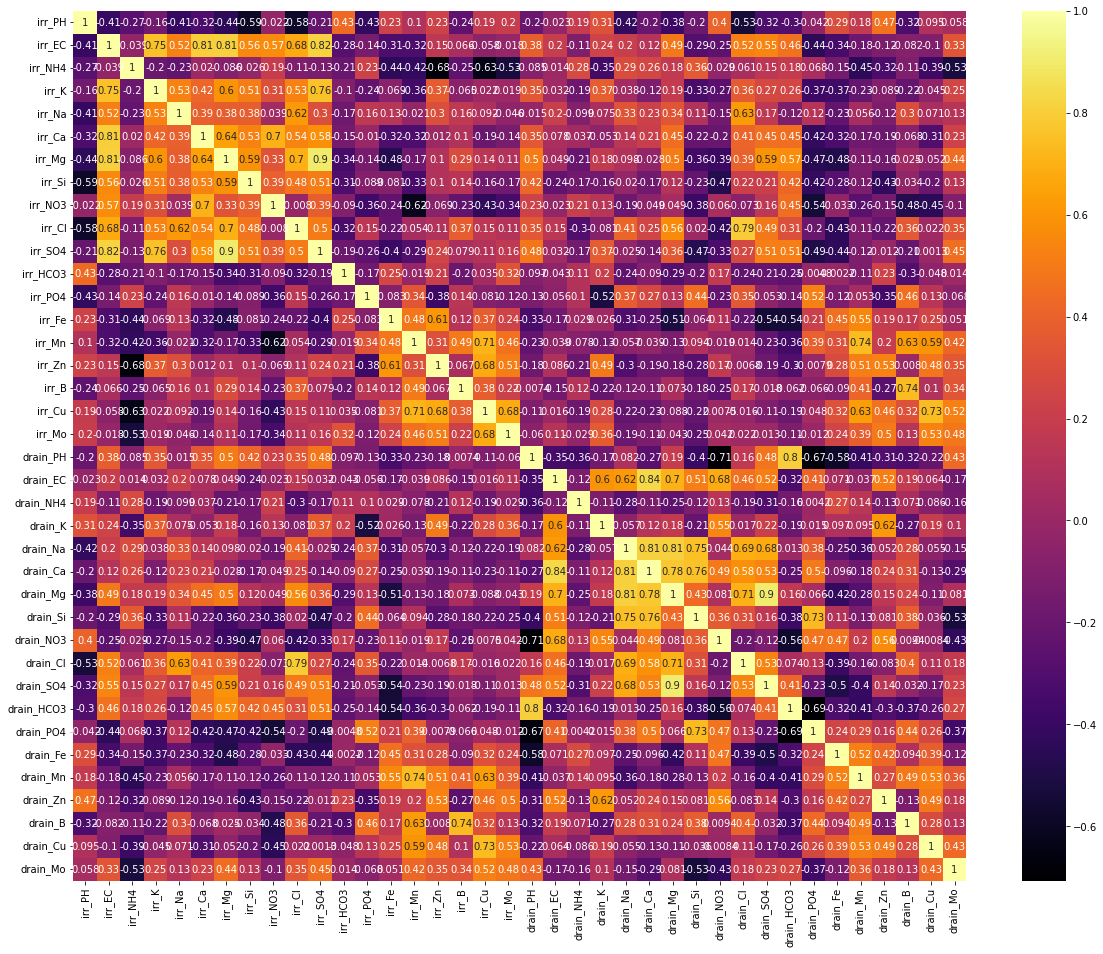

In [43]:
plt.rcParams['figure.figsize'] = [20, 16]
sns.heatmap(corelation,xticklabels=corelation.columns,yticklabels=corelation.columns,annot=True,cmap='inferno')
plt.show()

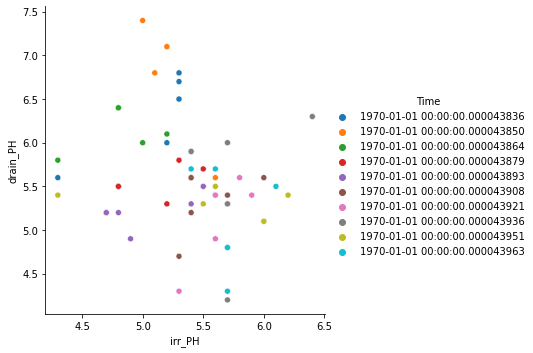

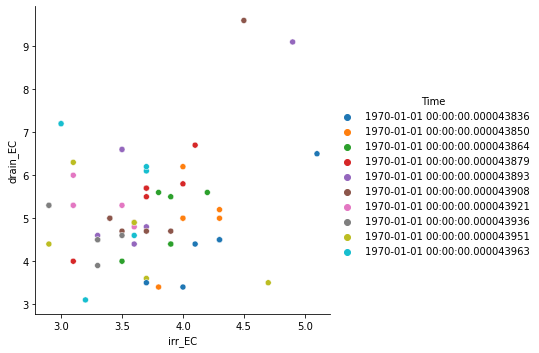

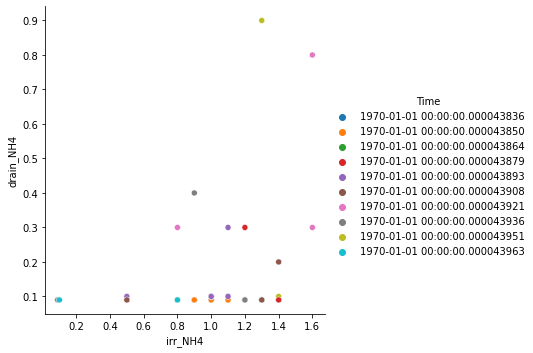

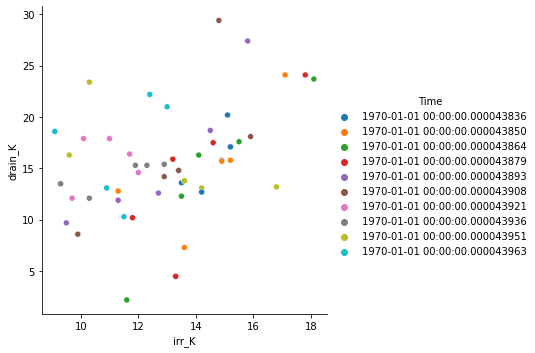

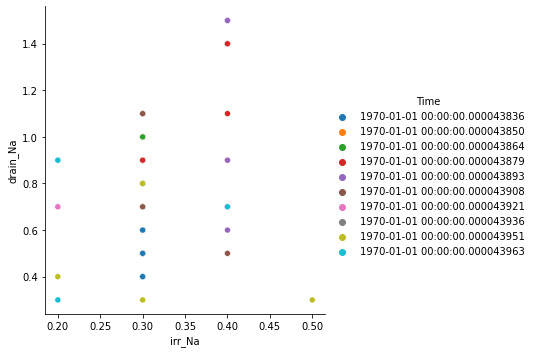

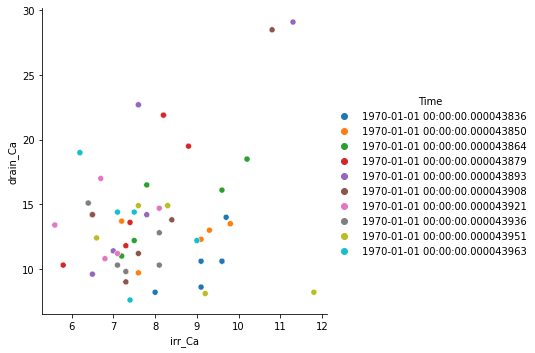

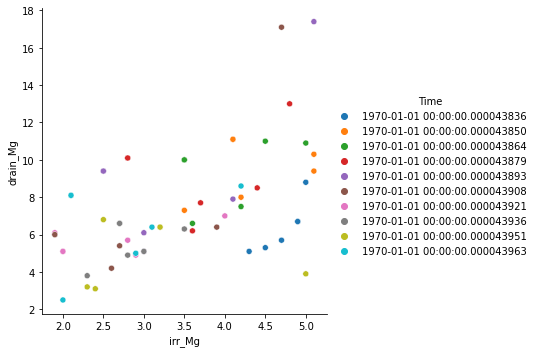

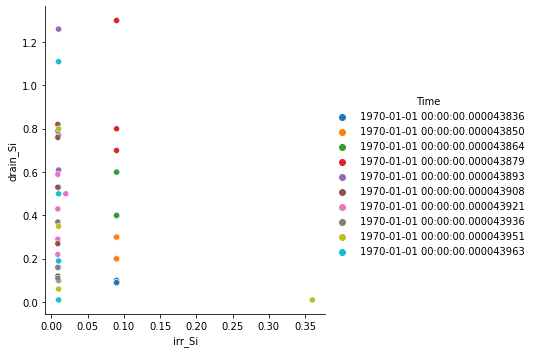

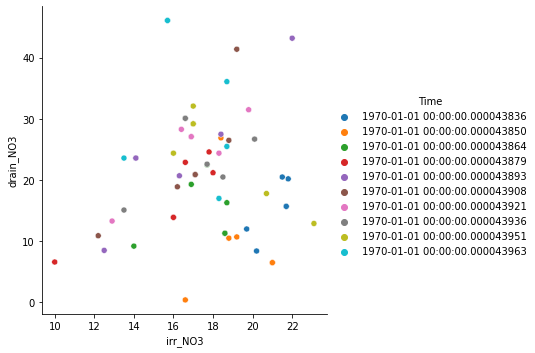

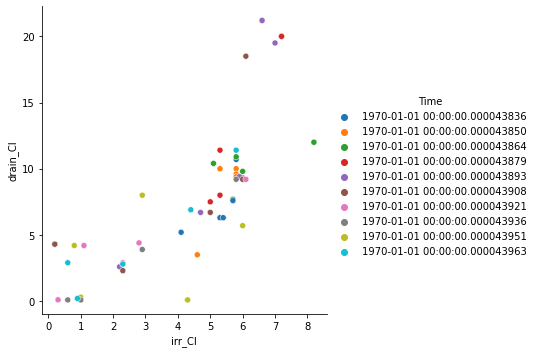

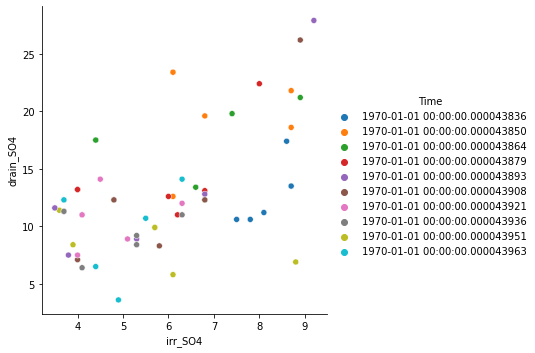

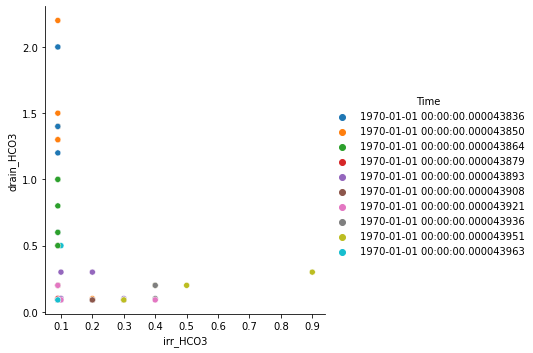

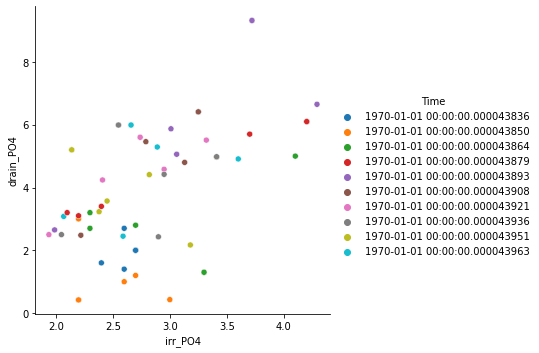

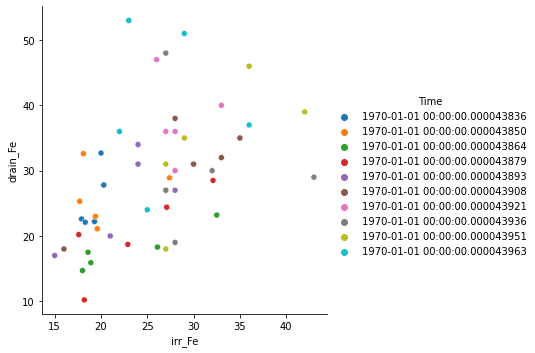

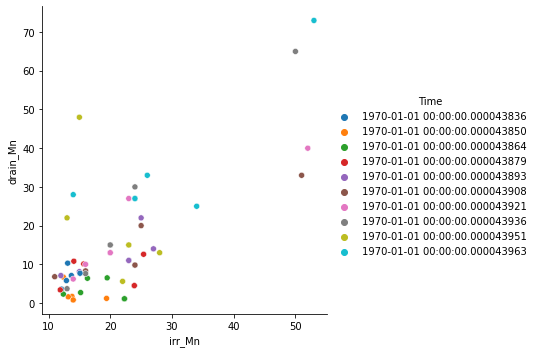

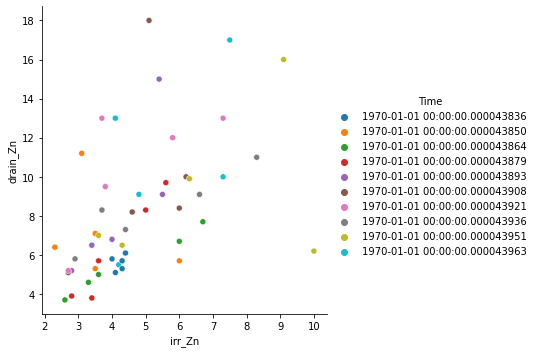

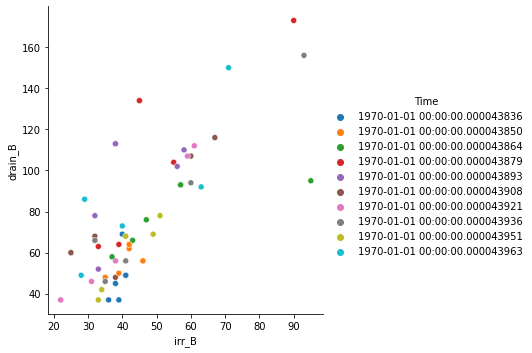

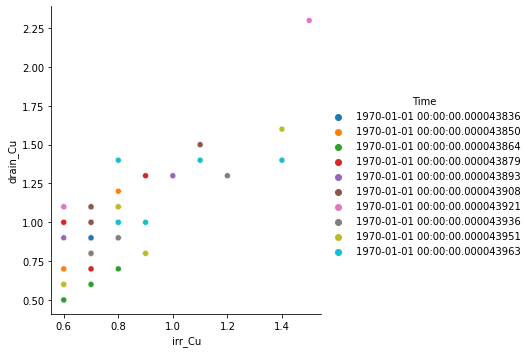

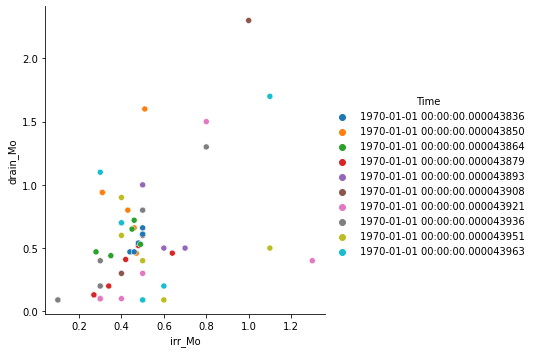

In [44]:
for i in res_lab:
  sns.relplot(x=f'irr_{i}',y=f'drain_{i}',data=lab_df,hue='Time')


<Figure size 720x432 with 0 Axes>

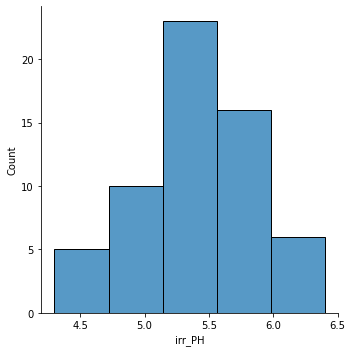

<Figure size 720x432 with 0 Axes>

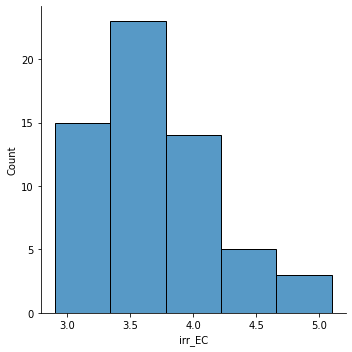

<Figure size 720x432 with 0 Axes>

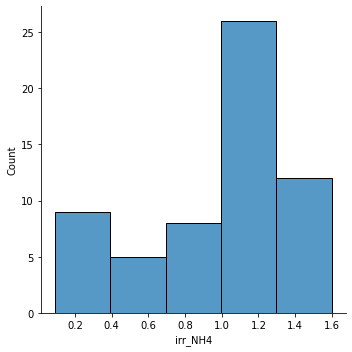

<Figure size 720x432 with 0 Axes>

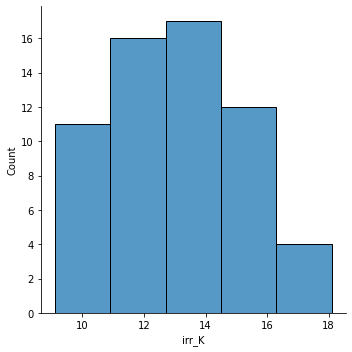

<Figure size 720x432 with 0 Axes>

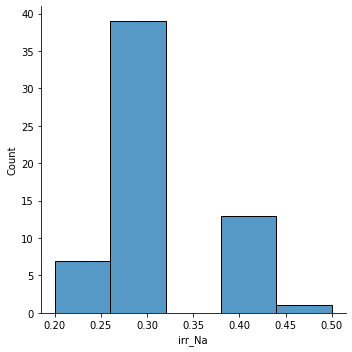

<Figure size 720x432 with 0 Axes>

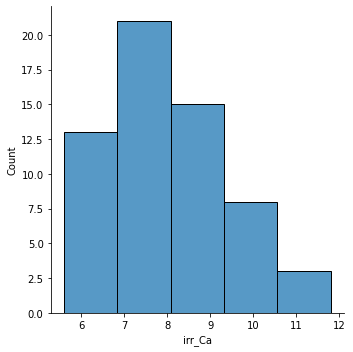

<Figure size 720x432 with 0 Axes>

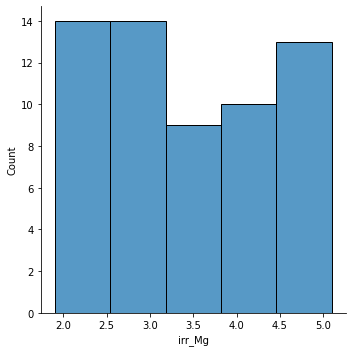

<Figure size 720x432 with 0 Axes>

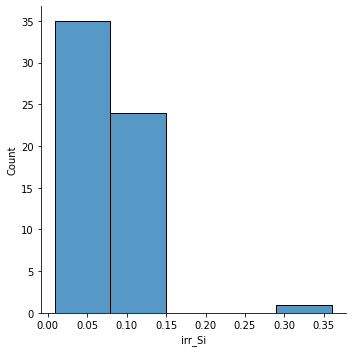

<Figure size 720x432 with 0 Axes>

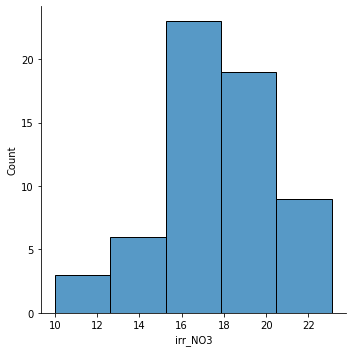

<Figure size 720x432 with 0 Axes>

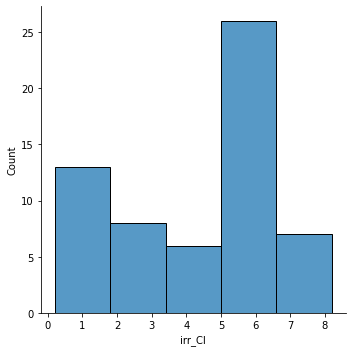

<Figure size 720x432 with 0 Axes>

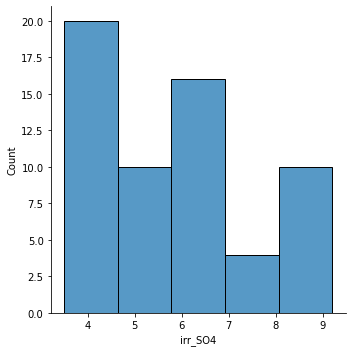

<Figure size 720x432 with 0 Axes>

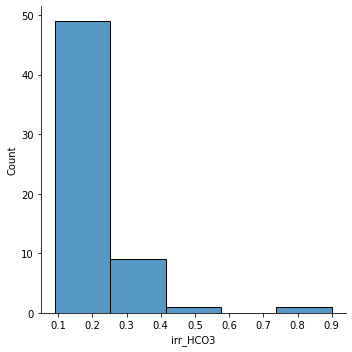

<Figure size 720x432 with 0 Axes>

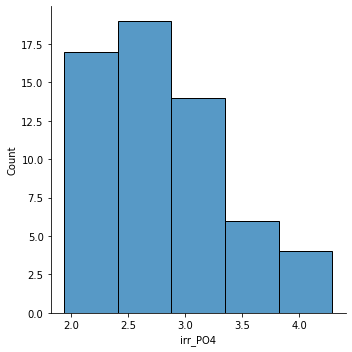

<Figure size 720x432 with 0 Axes>

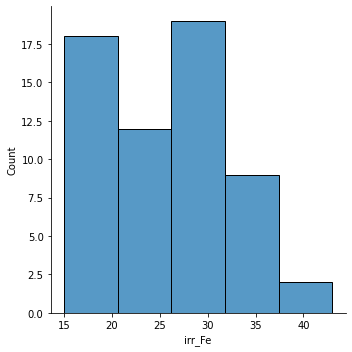

<Figure size 720x432 with 0 Axes>

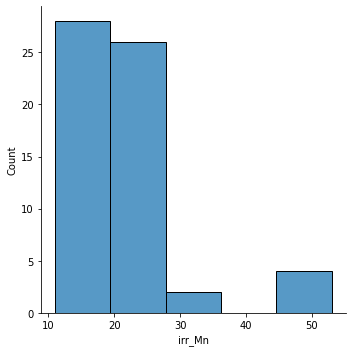

<Figure size 720x432 with 0 Axes>

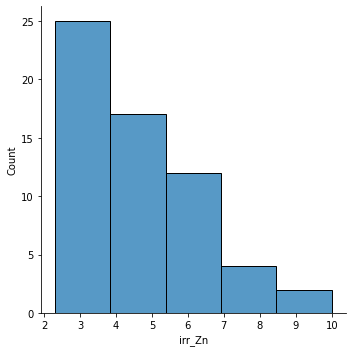

<Figure size 720x432 with 0 Axes>

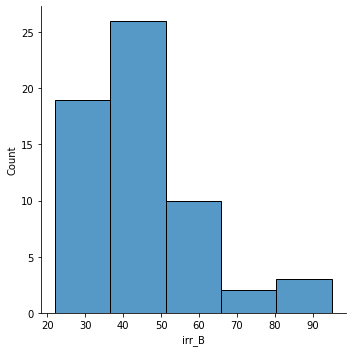

<Figure size 720x432 with 0 Axes>

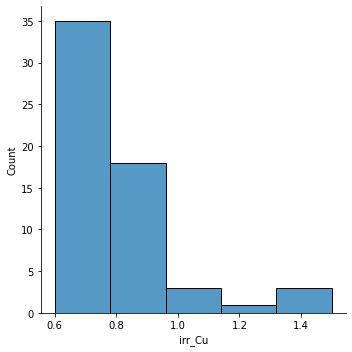

<Figure size 720x432 with 0 Axes>

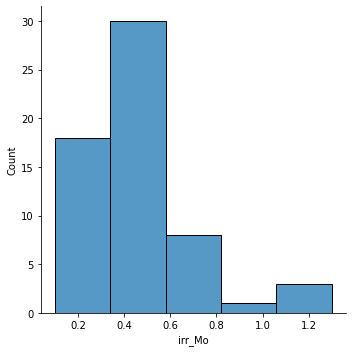

<Figure size 720x432 with 0 Axes>

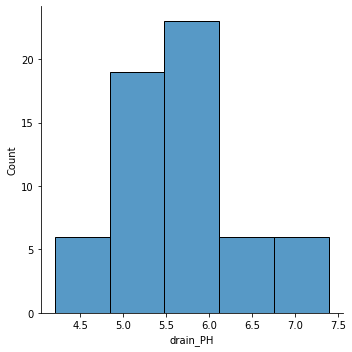

<Figure size 720x432 with 0 Axes>

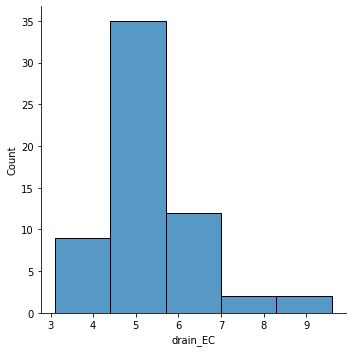

<Figure size 720x432 with 0 Axes>

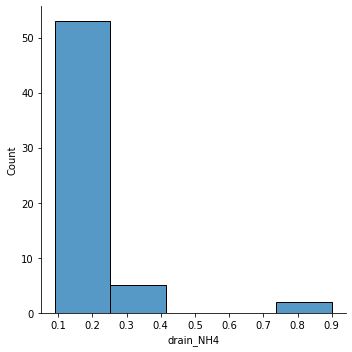

<Figure size 720x432 with 0 Axes>

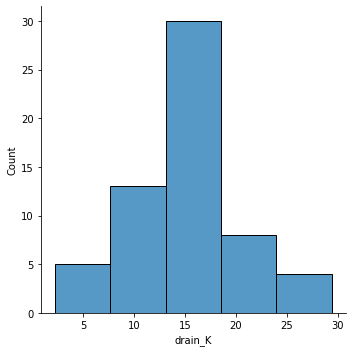

<Figure size 720x432 with 0 Axes>

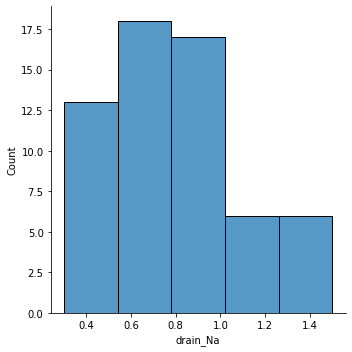

<Figure size 720x432 with 0 Axes>

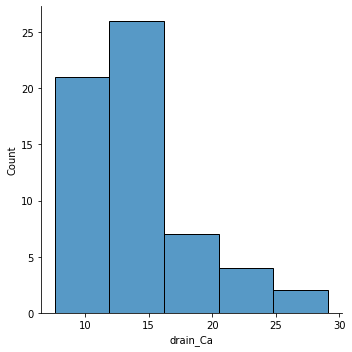

<Figure size 720x432 with 0 Axes>

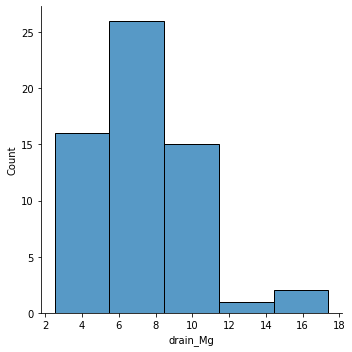

<Figure size 720x432 with 0 Axes>

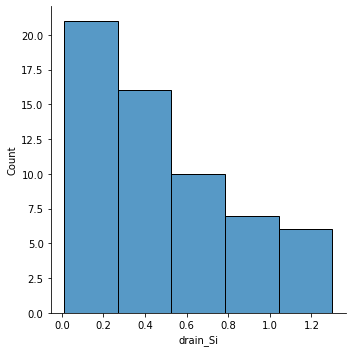

<Figure size 720x432 with 0 Axes>

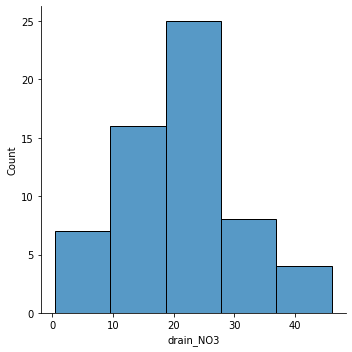

<Figure size 720x432 with 0 Axes>

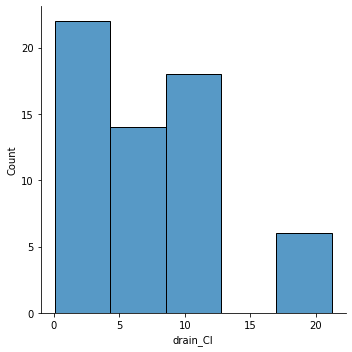

<Figure size 720x432 with 0 Axes>

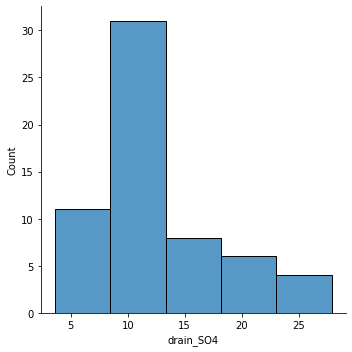

<Figure size 720x432 with 0 Axes>

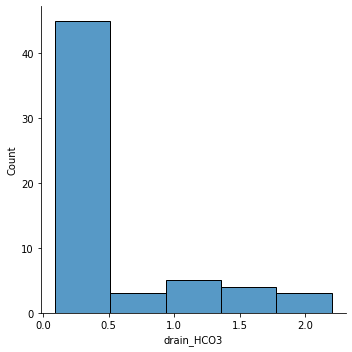

<Figure size 720x432 with 0 Axes>

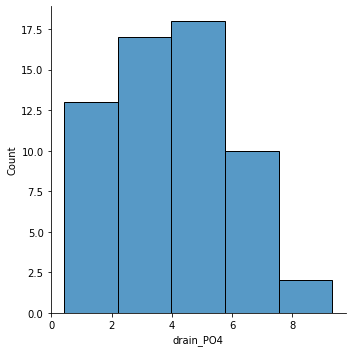

<Figure size 720x432 with 0 Axes>

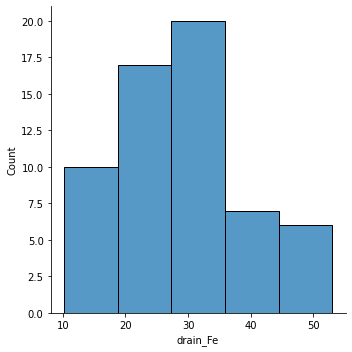

<Figure size 720x432 with 0 Axes>

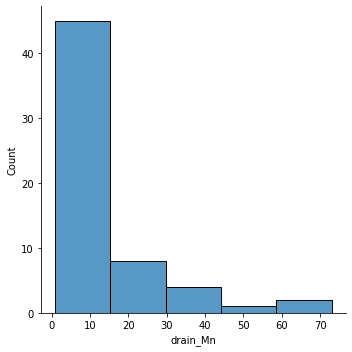

<Figure size 720x432 with 0 Axes>

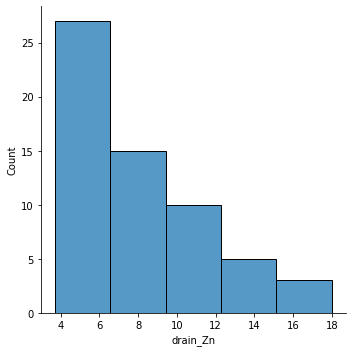

<Figure size 720x432 with 0 Axes>

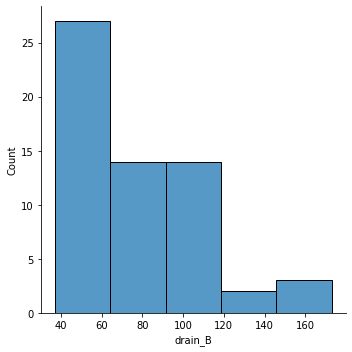

<Figure size 720x432 with 0 Axes>

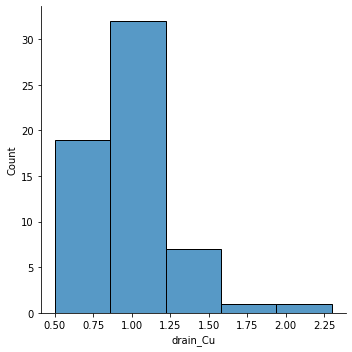

<Figure size 720x432 with 0 Axes>

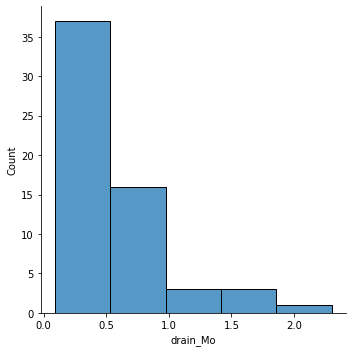

In [45]:
for i in x:
    plt.figure(figsize=(10,6))
    sns.displot(lab_df[i],bins=5)